In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load the dataset
df=pd.read_csv(r"/content/ai_assistant_usage_student_life.csv")
print(df.head(5))

      SessionID   StudentLevel        Discipline SessionDate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   
2  SESSION00003  Undergraduate          Business  2025-01-12   
3  SESSION00004  Undergraduate  Computer Science  2025-05-06   
4  SESSION00005  Undergraduate        Psychology  2025-03-18   

   SessionLengthMin  TotalPrompts  TaskType  AI_AssistanceLevel  \
0             31.20            11  Studying                   2   
1             13.09             6  Studying                   3   
2             19.22             5    Coding                   3   
3              3.70             1    Coding                   3   
4             28.12             9   Writing                   3   

           FinalOutcome  UsedAgain  SatisfactionRating  
0  Assignment Completed       True                 1.0  
1  Assignment Completed       True                 2.0  
2  Assignment Completed       True       

In [ ]:
#checking the dataset  shape(rows,columns)
df_shape = df.shape
print(df_shape)

(10000, 11)


In [ ]:
#checking column names and datatypes
print(df.dtypes)

SessionID              object
StudentLevel           object
Discipline             object
SessionDate            object
SessionLengthMin      float64
TotalPrompts            int64
TaskType               object
AI_AssistanceLevel      int64
FinalOutcome           object
UsedAgain                bool
SatisfactionRating    float64
dtype: object


In [ ]:
#checking for missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)


SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64


In [ ]:
#showing summary statistics for SLM AND TP
print(df[['SessionLengthMin', 'TotalPrompts']].describe())

       SessionLengthMin  TotalPrompts
count      10000.000000  10000.000000
mean          19.846467      5.607500
std           13.897302      4.648764
min            0.030000      1.000000
25%            9.630000      2.000000
50%           16.650000      4.000000
75%           26.670000      8.000000
max          110.810000     39.000000


In [ ]:
#finding unique values
print(f"6. Unique values in 'StudentLevel', 'Discipline', and 'TaskType'")
print(f"Student Level: {df['StudentLevel'].nunique()}")
print(f"Discipline: {df['Discipline'].nunique()}")
print(f"TaskType: {df['TaskType'].nunique()}")

6. Unique values in 'StudentLevel', 'Discipline', and 'TaskType'
Student Level: 3
Discipline: 7
TaskType: 6


In [ ]:
#the tasktype which is common
print("7. Most common 'TaskType'")
df['TaskType'].mode()[0]

7. Most common 'TaskType'


'Writing'

In [ ]:
#average of SessionLenghtMin and StudentLevel
print("8.Average SessionLengthMin")
df.groupby('StudentLevel')['SessionLengthMin'].mean()

8.Average SessionLengthMin


,SessionLengthMin
StudentLevel,
Graduate,20.252236
High School,20.023740
Undergraduate,19.650943


# PART B


```
# This is formatted as code
```



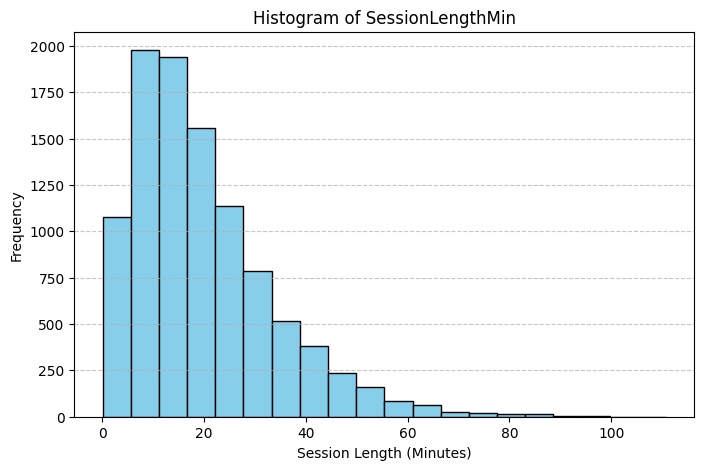

In [ ]:
#plotting a histogram
plt.figure(figsize=(8,5))
plt.hist(df['SessionLengthMin'], bins=20,color ='skyblue', edgecolor='black')
plt.xlabel('Session Length (Minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of SessionLengthMin')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

10. Bar Chart of Session Counts by StudentLevel


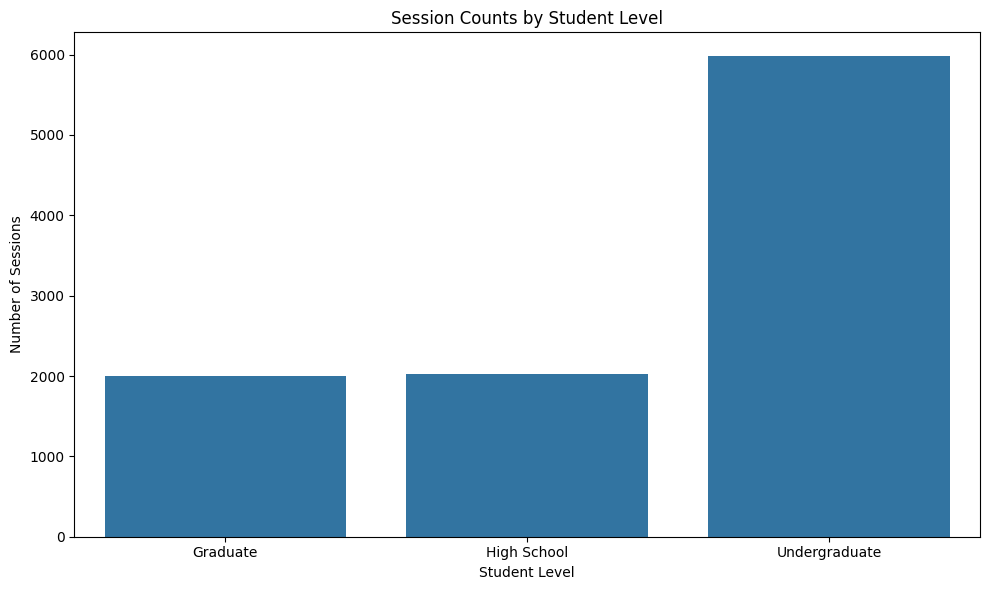

In [ ]:
#creating a barchart of session for studentlevel
print("10. Bar Chart of Session Counts by StudentLevel")
plt.figure(figsize=(10, 6))
student_level_counts = df['StudentLevel'].value_counts().sort_index()
sns.barplot(x=student_level_counts.index, y=student_level_counts.values)
plt.title('Session Counts by Student Level')
plt.xlabel('Student Level')
plt.ylabel('Number of Sessions')
plt.tight_layout()
plt.savefig('bar_chart_StudentLevel.png')
plt.show()

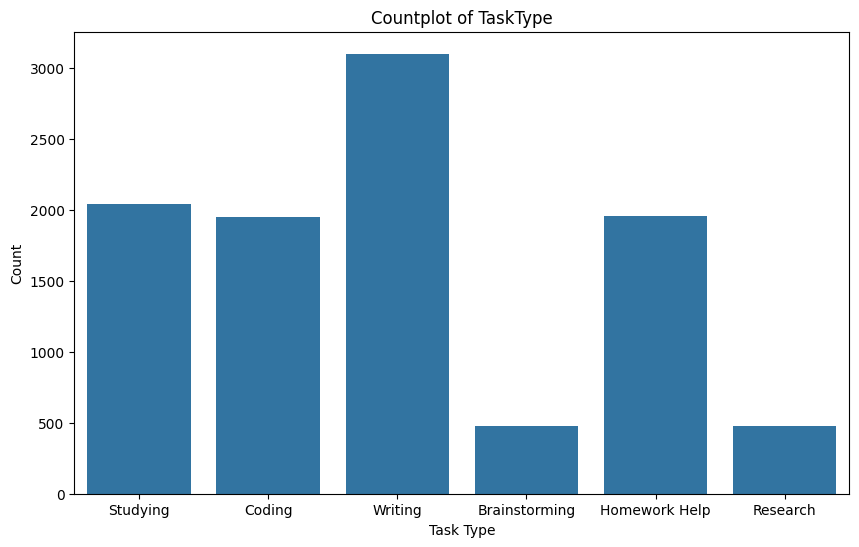

In [ ]:
# Creating a countplot of tasktype
plt.figure(figsize=(10,6))
sns.countplot(x="TaskType", data=df)

plt.title("Countplot of TaskType")
plt.xlabel("Task Type")
plt.ylabel("Count")
plt.show()


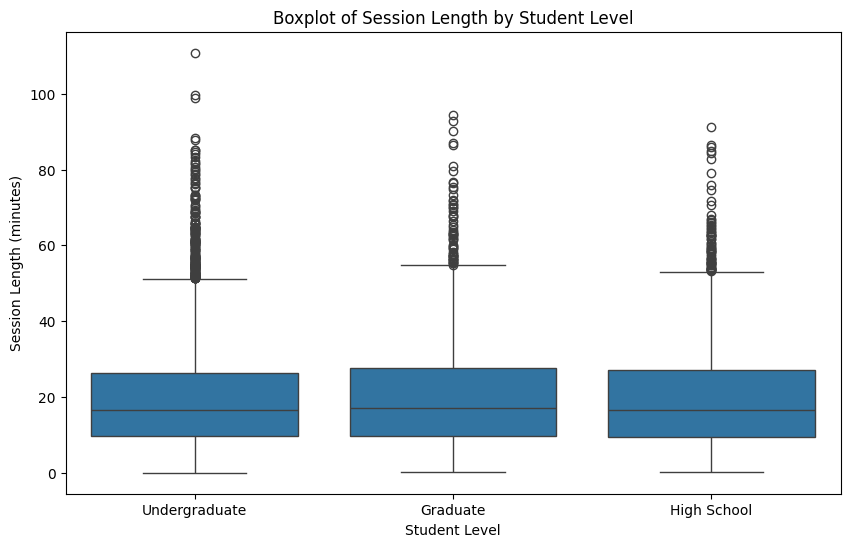

In [ ]:
# Creating a boxplot of SessionLengthMin grouped by StudentLevel
plt.figure(figsize=(10,6))
sns.boxplot(x="StudentLevel", y="SessionLengthMin", data=df)

plt.title("Boxplot of Session Length by Student Level")
plt.xlabel("Student Level")
plt.ylabel("Session Length (minutes)")
plt.show()

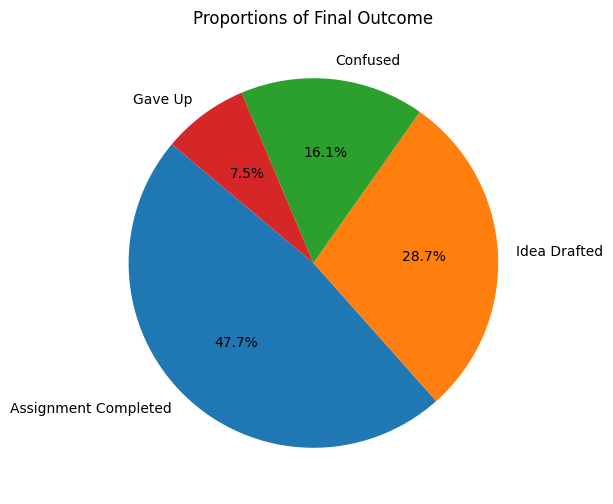

In [ ]:
#Creating a pie chart showing proportions of FinalOutcome.
# Count each category
counts = df["FinalOutcome"].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140)

plt.title("Proportions of Final Outcome")
plt.show()

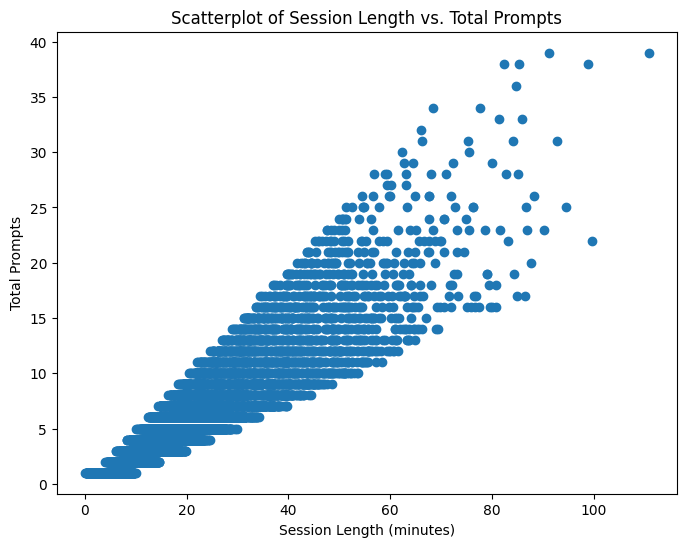

In [ ]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df["SessionLengthMin"], df["TotalPrompts"])

plt.title("Scatterplot of Session Length vs. Total Prompts")
plt.xlabel("Session Length (minutes)")
plt.ylabel("Total Prompts")
plt.show()

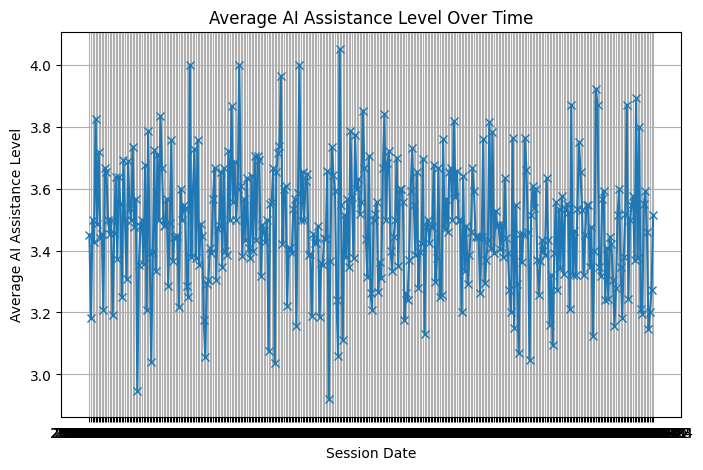

In [ ]:
# Plotting a line chart of average AI_AssistanceLevel over time (SessionDate).
#Compute average per date
avg_data = df.groupby("SessionDate")["AI_AssistanceLevel"].mean()

# Line chart
plt.figure(figsize=(8,5))
plt.plot(avg_data.index, avg_data.values, marker="x")

plt.title("Average AI Assistance Level Over Time")
plt.xlabel("Session Date")
plt.ylabel("Average AI Assistance Level")
plt.grid(True)
plt.show()

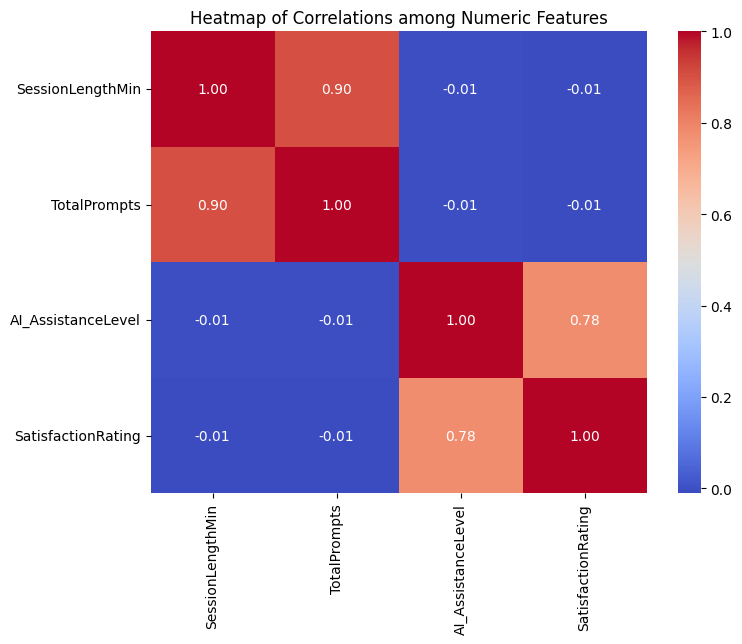

In [ ]:
#Creating a heatmap of correlations among numeric features.
 # Compute correlations
corr = df.select_dtypes(include=["number"]).corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Heatmap of Correlations among Numeric Features")
plt.show()


# PART C


In [ ]:
#Finding the average SessionLengthMin for each TaskType.
 # Group by TaskType and find average SessionLengthMin
avg_lengths = df.groupby("TaskType")["SessionLengthMin"].mean()

print(avg_lengths)



TaskType
Brainstorming    21.964223
Coding           19.467659
Homework Help    19.940536
Research         20.410000
Studying         19.705917
Writing          19.705888
Name: SessionLengthMin, dtype: float64


In [ ]:
#Which Discipline had the most sessions?
 # Count how many times each Discipline appears
counts = df["Discipline"].value_counts()

print(counts)

# Get the top discipline
top_discipline = counts.idxmax()
print("Discipline with most sessions:", top_discipline)

Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
History             1417
Business            1410
Name: count, dtype: int64
Discipline with most sessions: Biology


In [ ]:
#Comparing average AI_AssistanceLevel across StudentLevel.
# Assuming df is your DataFrame
avg_assistance = df.groupby("StudentLevel")["AI_AssistanceLevel"].mean()

print(avg_assistance)

StudentLevel
Graduate         3.469674
High School      3.477060
Undergraduate    3.483607
Name: AI_AssistanceLevel, dtype: float64


In [ ]:
#Finding the most common FinalOutcome for Graduate students.
 # Filter Graduate students only
graduates = df[df["StudentLevel"] == "Graduate"]

# Find the most common FinalOutcome
most_common_outcome = graduates["FinalOutcome"].value_counts().idxmax()

print("Most common FinalOutcome for Graduate students:", most_common_outcome)


Most common FinalOutcome for Graduate students: Assignment Completed


In [ ]:
#Calculating the median SessionLengthMin for each FinalOutcome.
 # Group by FinalOutcome and calculate median SessionLengthMin
median_lengths = df.groupby("FinalOutcome")["SessionLengthMin"].median()

print(median_lengths)



FinalOutcome
Assignment Completed    16.570
Confused                16.040
Gave Up                 17.290
Idea Drafted            17.085
Name: SessionLengthMin, dtype: float64


# PART D

In [ ]:
#Converting SessionDate into Year, Month, and Day columns.
# Ensure SessionDate is in datetime format
df["SessionDate"] = pd.to_datetime(df["SessionDate"])

# Create new columns
df["Year"] = df["SessionDate"].dt.year
df["Month"] = df["SessionDate"].dt.month
df["Day"] = df["SessionDate"].dt.day

print(df.head())

      SessionID   StudentLevel        Discipline SessionDate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   
2  SESSION00003  Undergraduate          Business  2025-01-12   
3  SESSION00004  Undergraduate  Computer Science  2025-05-06   
4  SESSION00005  Undergraduate        Psychology  2025-03-18   

   SessionLengthMin  TotalPrompts  TaskType  AI_AssistanceLevel  \
0             31.20            11  Studying                   2   
1             13.09             6  Studying                   3   
2             19.22             5    Coding                   3   
3              3.70             1    Coding                   3   
4             28.12             9   Writing                   3   

           FinalOutcome  UsedAgain  SatisfactionRating  Year  Month  Day  
0  Assignment Completed       True                 1.0  2024     11    3  
1  Assignment Completed       True                 2.0  2024  

In [ ]:
#Encoding StudentLevel using Label Encoding.
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
le = LabelEncoder()

# Fit and transform StudentLevel column
df["StudentLevel_encoded"] = le.fit_transform(df["StudentLevel"])

print(df[["StudentLevel", "StudentLevel_encoded"]].head())

    StudentLevel  StudentLevel_encoded
0  Undergraduate                     2
1  Undergraduate                     2
2  Undergraduate                     2
3  Undergraduate                     2
4  Undergraduate                     2


In [ ]:
#Applying One-Hot Encoding to TaskType.
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["TaskType"])

print(df_encoded.head())


      SessionID   StudentLevel        Discipline SessionDate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   
2  SESSION00003  Undergraduate          Business  2025-01-12   
3  SESSION00004  Undergraduate  Computer Science  2025-05-06   
4  SESSION00005  Undergraduate        Psychology  2025-03-18   

   SessionLengthMin  TotalPrompts  AI_AssistanceLevel          FinalOutcome  \
0             31.20            11                   2  Assignment Completed   
1             13.09             6                   3  Assignment Completed   
2             19.22             5                   3  Assignment Completed   
3              3.70             1                   3  Assignment Completed   
4             28.12             9                   3  Assignment Completed   

   UsedAgain  SatisfactionRating  Year  Month  Day  StudentLevel_encoded  \
0       True                 1.0  2024     11    3              

In [ ]:
#Creating a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin.
 # Create new feature
df["PromptsPerMinute"] = df["TotalPrompts"] / df["SessionLengthMin"]

print(df[["TotalPrompts", "SessionLengthMin", "PromptsPerMinute"]].head())


   TotalPrompts  SessionLengthMin  PromptsPerMinute
0            11             31.20          0.352564
1             6             13.09          0.458365
2             5             19.22          0.260146
3             1              3.70          0.270270
4             9             28.12          0.320057


In [ ]:
#Bin SessionLengthMin into categories: Short, Medium, Long.
 # Define bins and labels
bins = [0, 30, 60, float("inf")]   # ranges: 0–30, 31–60, >60
labels = ["Short", "Medium", "Long"]

# Create new column
df["SessionCategory"] = pd.cut(df["SessionLengthMin"], bins=bins, labels=labels)

print(df[["SessionLengthMin", "SessionCategory"]].head())




   SessionLengthMin SessionCategory
0             31.20          Medium
1             13.09           Short
2             19.22           Short
3              3.70           Short
4             28.12           Short


# PART E


In [ ]:
#Predicting FinalOutcome using a Decision Tree Classifier.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("/content/ai_assistant_usage_student_life.csv")

# Features (X) and target (y)
X = df.drop("FinalOutcome", axis=1)
y = df["FinalOutcome"]

# Convert categorical variables into numbers
X = pd.get_dummies(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42
)

# Train a Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.4235


In [ ]:
#Predict UsedAgain using Logistic Regression.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("/content/ai_assistant_usage_student_life.csv")

 # Features (X) and target (y)
X = df.drop("UsedAgain", axis=1)
y = df["UsedAgain"]

# Convert categorical variables into numbers
X = pd.get_dummies(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)  # increase iterations for convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.731


In [ ]:
#Train a Random Forest Classifier to predict FinalOutcome.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Target column
TARGET = "FinalOutcome"
y = df[TARGET]
X = df.drop(columns=[TARGET])

# Encode categorical columns
label_encoders = {}
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

# Encode target if it's categorical
if y.dtype == "object":
    le_y = LabelEncoder()
    y = le_y.fit_transform(y.astype(str))
    label_encoders[TARGET] = le_y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4805
Confusion Matrix:
 [[721  72   6 131]
 [182  98  16  53]
 [ 90  51   4  25]
 [376  36   1 138]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.78      0.63       930
           1       0.38      0.28      0.32       349
           2       0.15      0.02      0.04       170
           3       0.40      0.25      0.31       551

    accuracy                           0.48      2000
   macro avg       0.36      0.33      0.32      2000
weighted avg       0.43      0.48      0.44      2000



In [ ]:
#Use KNN (K-Nearest Neighbors) to classify UsedAgain.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Target column
TARGET = "UsedAgain"
y = df[TARGET]
X = df.drop(columns=[TARGET])

# Encode categorical columns
label_encoders = {}
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

# Encode target if categorical
if y.dtype == "object":
    le_y = LabelEncoder()
    y = le_y.fit_transform(y.astype(str))
    label_encoders[TARGET] = le_y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.6255
Confusion Matrix:
 [[  88  527]
 [ 222 1163]]
Classification Report:
               precision    recall  f1-score   support

       False       0.28      0.14      0.19       615
        True       0.69      0.84      0.76      1385

    accuracy                           0.63      2000
   macro avg       0.49      0.49      0.47      2000
weighted avg       0.56      0.63      0.58      2000



In [ ]:
#Train a Naive Bayes Classifier to predict FinalOutcome.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Target column
TARGET = "FinalOutcome"
y = df[TARGET]
X = df.drop(columns=[TARGET])

# Encode categorical columns
label_encoders = {}
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

# Encode target if categorical
if y.dtype == "object":
    le_y = LabelEncoder()
    y = le_y.fit_transform(y.astype(str))
    label_encoders[TARGET] = le_y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.475
Confusion Matrix:
 [[710 184   9  27]
 [127 207   9   6]
 [ 70  91   4   5]
 [419 100   3  29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.76      0.63       930
           1       0.36      0.59      0.44       349
           2       0.16      0.02      0.04       170
           3       0.43      0.05      0.09       551

    accuracy                           0.47      2000
   macro avg       0.37      0.36      0.30      2000
weighted avg       0.44      0.47      0.40      2000



In [ ]:
 #Build a Gradient Boosting Classifier for UsedAgain.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode all object (string) columns into numbers
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop("UsedAgain", axis=1)
y = df["UsedAgain"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict and check accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7385


In [ ]:
#Apply an XGBoost Classifier to predict FinalOutcome.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Features and target
X = df.drop("FinalOutcome", axis=1)
y = df["FinalOutcome"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
model.fit(X_train, y_train)

# Predict & check accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:33:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.453


In [ ]:
#Split the dataset into 80% training and 20% testing sets.
import pandas as pd
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop("FinalOutcome", axis=1)   # predictors
y = df["FinalOutcome"]                # target

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])




Training set size: 8000
Testing set size: 2000


In [ ]:
#Evaluate one model using accuracy and a confusion matrix.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Features and target
X = df.drop("FinalOutcome", axis=1)
y = df["FinalOutcome"]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# ✅ Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.3755

Confusion Matrix:
 [[460 139  69 262]
 [124  87  41  97]
 [ 73  47  16  34]
 [251  80  32 188]]


In [ ]:
#Generate a classification report (precision, recall, f1-score).
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and target
X = df.drop("FinalOutcome", axis=1)
y = df["FinalOutcome"]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# ✅ Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.3755

Confusion Matrix:
 [[460 139  69 262]
 [124  87  41  97]
 [ 73  47  16  34]
 [251  80  32 188]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.49      0.50       930
           1       0.25      0.25      0.25       349
           2       0.10      0.09      0.10       170
           3       0.32      0.34      0.33       551

    accuracy                           0.38      2000
   macro avg       0.29      0.29      0.29      2000
weighted avg       0.38      0.38      0.38      2000



#PART F

In [ ]:
#Perform cross-validation for Logistic Regression.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Features and target
X = df.drop("FinalOutcome", axis=1)
y = df["FinalOutcome"]

# Logistic Regression with scaling + more iterations
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.484  0.48   0.469  0.477  0.4775]
Mean accuracy: 0.4774999999999999


In [ ]:
#Use GridSearchCV to tune hyperparameters of a Decision Tree.
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Features and target
X = df.drop("FinalOutcome", axis=1)
y = df["FinalOutcome"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid (only a few options to keep it simple)
param_grid = {
    "max_depth": [3, 5, None],
    "criterion": ["gini", "entropy"]
}

# GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)
print("Test accuracy:", grid.score(X_test, y_test))


Best parameters: {'criterion': 'entropy', 'max_depth': 3}
Best cross-validation score: 0.5018750000000001
Test accuracy: 0.488


In [ ]:
#Tune a Random Forest Classifier (n_estimators, max_depth).
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df.drop("FinalOutcome", axis=1)
y = df["FinalOutcome"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid (tuning n_estimators and max_depth only)
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10]
}

# GridSearchCV
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))


Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.499
Test Accuracy: 0.48


In [ ]:
#Compare Logistic Regression, Decision Tree, Random Forest, Naive Bayes, KNN, Gradient Boosting, and XGBoost for predicting UsedAgain.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Encode strings
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop("UsedAgain", axis=1)
y = df["UsedAgain"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ("LogReg", LogisticRegression(max_iter=1000)),
    ("DecisionTree", DecisionTreeClassifier()),
    ("RandomForest", RandomForestClassifier()),
    ("NaiveBayes", GaussianNB()),
    ("KNN", KNeighborsClassifier()),
    ("GradientBoost", GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
]

for name, model in models:
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name}: {acc:.4f}")




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogReg: 0.6925
DecisionTree: 0.6385
RandomForest: 0.7340
NaiveBayes: 0.6925
KNN: 0.6255
GradientBoost: 0.7385
XGBoost: 0.7065


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:52:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
